In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Classify-2D-wLabels-3.txt', sep=',', header=None, names=["Col1", "Col2", "Class"])
df["Class"] = df[["Class"]].replace(0,-1)
df.head()

,Col1,Col2,Class
0,-0.50,0.73,-1
1,0.68,-0.41,1
2,0.81,-0.15,1
3,-0.63,0.41,1
4,-0.37,0.86,-1


In [3]:
df1 = df[df['Class'] == 1]
df2 = df[df['Class'] == -1]
df1 = df1.drop(['Class'], axis=1)
df2 = df2.drop(['Class'], axis=1)
x_1 = df1.to_numpy()
x_2 = df2.to_numpy()
m1 = df1.shape[0]
m2 = df2.shape[0]
df1_sum = df1.sum(axis=0)
df2_sum = df2.sum(axis=0)
df1_mean = df1_sum/m1
df2_mean = df2_sum/m2
mean_1 = df1_mean.to_numpy()
mean_2 = df2_mean.to_numpy()
print(x_1.shape[0], 'originally classified as 1')
print(x_2.shape[0], 'originally classified as -1')

91 originally classified as 1
159 originally classified as -1


In [4]:
takenorm_1_1 = x_1-mean_1
takenorm_1_2 = x_1-mean_2
takenorm_2_1 = x_2-mean_1
takenorm_2_2 = x_2-mean_2
norm_1_1 = []
norm_1_2 = []
classify_as_1 = []
classify_as_neg1 = []
for i in range (0,m1):
    i1 = np.sqrt((takenorm_1_1[i,0]**2) + (takenorm_1_1[i,1]**2))
    norm_1_1.append(i1)
    i2 = np.sqrt((takenorm_1_2[i,0]**2) + (takenorm_1_2[i,1]**2))
    norm_1_2.append(i2)
norm_1_1 = np.array(norm_1_1)
norm_1_2 = np.array(norm_1_2)
classify_1 = []
error_1 = 0
for i in range (0,m1):
    if norm_1_1[i] < norm_1_2[i]:
        classify_1.append(1)
        classify_as_1.append(x_1[i])
    else:
        classify_1.append(0)
        error_1 = error_1 + 1
        classify_as_neg1.append(x_1[i])
norm_2_1 = []
norm_2_2 = []
for i in range (0,m2):
    i1 = np.sqrt((takenorm_2_1[i,0]**2) + (takenorm_2_1[i,1]**2))
    norm_2_1.append(i1)
    i2 = np.sqrt((takenorm_2_2[i,0]**2) + (takenorm_2_2[i,1]**2))
    norm_2_2.append(i2)
norm_2_1 = np.array(norm_2_1)
norm_2_2 = np.array(norm_2_2)
classify_2 = []
error_2 = 0
for i in range (0,m2):
    if norm_2_2[i] < norm_2_1[i]:
        classify_2.append(1)
        classify_as_neg1.append(x_2[i])
    else:
        classify_2.append(0)
        error_2 = error_2 + 1
        classify_as_1.append(x_2[i])

120 classified as 1
130 classified as -1
The number of missclassified points is 113 out of 250


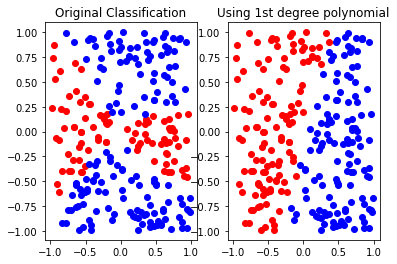

In [5]:
classify_as_1 = np.array(classify_as_1)
classify_as_neg1 = np.array(classify_as_neg1)
print(classify_as_1.shape[0], 'classified as 1')
print(classify_as_neg1.shape[0], 'classified as -1')
error = error_1 + error_2
print('The number of missclassified points is', error, 'out of', df.shape[0])
fig = plt.figure()
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.scatter(x_1[:,0], x_1[:,1], c='red')
ax1.scatter(x_2[:,0], x_2[:,1], c='blue')
ax1.title.set_text("Original Classification")
ax2.scatter(classify_as_1[:,0], classify_as_1[:,1], c='red')
ax2.scatter(classify_as_neg1[:,0], classify_as_neg1[:,1], c='blue')
ax2.title.set_text("Using 1st degree polynomial")
plt.show()

In [6]:
#apply the polynomial kernel expansion x1, x2, x1^2, x2^2, x1*x2, x1^3, x1^2 * x2, x1 * x2^2, x2^3
x_1_expanded = np.column_stack((x_1[:,0], x_1[:,1], x_1[:,0] ** 2, x_1[:,1] ** 2, x_1[:,0] * x_1[:,1]))
x_2_expanded = np.column_stack((x_2[:,0], x_2[:,1], x_2[:,0] ** 2, x_2[:,1] ** 2, x_2[:,0] * x_2[:,1]))
mean_1_expanded = np.mean(x_1_expanded, axis=0)
mean_2_expanded = np.mean(x_2_expanded, axis=0)
takenorm_1_1 = x_1_expanded-mean_1_expanded
takenorm_1_2 = x_1_expanded-mean_2_expanded
takenorm_2_1 = x_2_expanded-mean_1_expanded
takenorm_2_2 = x_2_expanded-mean_2_expanded
norm_1_1 = []
norm_1_2 = []
classify_as_1 = []
classify_as_neg1 = []
for i in range (0,m1):
    i1 = np.sqrt((takenorm_1_1[i,0]**2) + (takenorm_1_1[i,1]**2) + (takenorm_1_1[i,2]**2) + (takenorm_1_1[i,3]**2) + (takenorm_1_1[i,4]**2))
    norm_1_1.append(i1)
    i2 = np.sqrt((takenorm_1_2[i,0]**2) + (takenorm_1_2[i,1]**2) + (takenorm_1_2[i,2]**2) + (takenorm_1_2[i,3]**2) + (takenorm_1_2[i,4]**2))
    norm_1_2.append(i2)
norm_1_1 = np.array(norm_1_1)
norm_1_2 = np.array(norm_1_2)
classify_1 = []
error_1 = 0
for i in range (0,m1):
    if norm_1_1[i] < norm_1_2[i]:
        classify_1.append(1)
        classify_as_1.append(x_1[i])
    else:
        classify_1.append(0)
        error_1 = error_1 + 1
        classify_as_neg1.append(x_1[i])
norm_2_1 = []
norm_2_2 = []
for i in range (0,m2):
    i1 = np.sqrt((takenorm_2_1[i,0]**2) + (takenorm_2_1[i,1]**2) + (takenorm_2_1[i,2]**2) + (takenorm_2_1[i,3]**2) + (takenorm_2_1[i,4]**2))
    norm_2_1.append(i1)
    i2 = np.sqrt((takenorm_2_2[i,0]**2) + (takenorm_2_2[i,1]**2) + (takenorm_2_2[i,2]**2) + (takenorm_2_2[i,3]**2) + (takenorm_2_2[i,4]**2))
    norm_2_2.append(i2)
norm_2_1 = np.array(norm_2_1)
norm_2_2 = np.array(norm_2_2)
classify_2 = []
error_2 = 0
for i in range (0,m2):
    if norm_2_2[i] < norm_2_1[i]:
        classify_2.append(1)
        classify_as_neg1.append(x_2[i])
    else:
        classify_2.append(0)
        error_2 = error_2 + 1
        classify_as_1.append(x_2[i])

124 classified as 1
126 classified as -1
The number of missclassified points is 53 out of 250


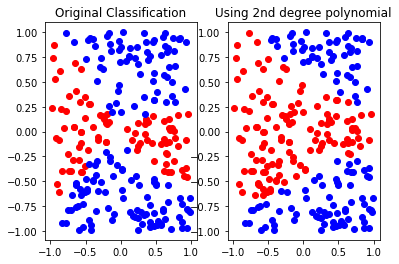

In [7]:
classify_as_1 = np.array(classify_as_1)
classify_as_neg1 = np.array(classify_as_neg1)
print(classify_as_1.shape[0], 'classified as 1')
print(classify_as_neg1.shape[0], 'classified as -1')
error = error_1 + error_2
print('The number of missclassified points is', error, 'out of', df.shape[0])
fig = plt.figure()
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.scatter(x_1[:,0], x_1[:,1], c='red')
ax1.scatter(x_2[:,0], x_2[:,1], c='blue')
ax1.title.set_text("Original Classification")
ax2.scatter(classify_as_1[:,0], classify_as_1[:,1], c='red')
ax2.scatter(classify_as_neg1[:,0], classify_as_neg1[:,1], c='blue')
ax2.title.set_text("Using 2nd degree polynomial")
plt.show()

In [8]:
#apply the polynomial kernel expansion x1, x2, x1^2, x2^2, x1*x2, x1^3, x1^2 * x2, x1 * x2^2, x2^3
x_1_expanded = np.column_stack((x_1[:,0], x_1[:,1], x_1[:,0] ** 2, x_1[:,1] ** 2, x_1[:,0] * x_1[:,1], x_1[:,0] ** 3, (x_1[:,0] ** 2) * x_1[:,1], x_1[:,0] * (x_1[:,1] ** 2), x_1[:,1] ** 3))
x_2_expanded = np.column_stack((x_2[:,0], x_2[:,1], x_2[:,0] ** 2, x_2[:,1] ** 2, x_2[:,0] * x_2[:,1], x_2[:,0] ** 3, (x_2[:,0] ** 2) * x_2[:,1], x_2[:,0] * (x_2[:,1] ** 2), x_2[:,1] ** 3))
mean_1_expanded = np.mean(x_1_expanded, axis=0)
mean_2_expanded = np.mean(x_2_expanded, axis=0)
takenorm_1_1 = x_1_expanded-mean_1_expanded
takenorm_1_2 = x_1_expanded-mean_2_expanded
takenorm_2_1 = x_2_expanded-mean_1_expanded
takenorm_2_2 = x_2_expanded-mean_2_expanded
norm_1_1 = []
norm_1_2 = []
classify_as_1 = []
classify_as_neg1 = []
for i in range (0,m1):
    i1 = np.sqrt((takenorm_1_1[i,0]**2) + (takenorm_1_1[i,1]**2) + (takenorm_1_1[i,2]**2) + (takenorm_1_1[i,3]**2) + (takenorm_1_1[i,4]**2) + (takenorm_1_1[i,5]**2) + (takenorm_1_1[i,6]**2) + (takenorm_1_1[i,7]**2) + (takenorm_1_1[i,8]**2))
    norm_1_1.append(i1)
    i2 = np.sqrt((takenorm_1_2[i,0]**2) + (takenorm_1_2[i,1]**2) + (takenorm_1_2[i,2]**2) + (takenorm_1_2[i,3]**2) + (takenorm_1_2[i,4]**2) + (takenorm_1_2[i,5]**2) + (takenorm_1_2[i,6]**2) + (takenorm_1_2[i,7]**2) + (takenorm_1_2[i,8]**2))
    norm_1_2.append(i2)
norm_1_1 = np.array(norm_1_1)
norm_1_2 = np.array(norm_1_2)
classify_1 = []
error_1 = 0
for i in range (0,m1):
    if norm_1_1[i] < norm_1_2[i]:
        classify_1.append(1)
        classify_as_1.append(x_1[i])
    else:
        classify_1.append(0)
        error_1 = error_1 + 1
        classify_as_neg1.append(x_1[i])
norm_2_1 = []
norm_2_2 = []
for i in range (0,m2):
    i1 = np.sqrt((takenorm_2_1[i,0]**2) + (takenorm_2_1[i,1]**2) + (takenorm_2_1[i,2]**2) + (takenorm_2_1[i,3]**2) + (takenorm_2_1[i,4]**2) + (takenorm_2_1[i,5]**2) + (takenorm_2_1[i,6]**2) + (takenorm_2_1[i,7]**2) + (takenorm_2_1[i,8]**2))
    norm_2_1.append(i1)
    i2 = np.sqrt((takenorm_2_2[i,0]**2) + (takenorm_2_2[i,1]**2) + (takenorm_2_2[i,2]**2) + (takenorm_2_2[i,3]**2) + (takenorm_2_2[i,4]**2) + (takenorm_2_2[i,5]**2) + (takenorm_2_2[i,6]**2) + (takenorm_2_2[i,7]**2) + (takenorm_2_2[i,8]**2))
    norm_2_2.append(i2)
norm_2_1 = np.array(norm_2_1)
norm_2_2 = np.array(norm_2_2)
classify_2 = []
error_2 = 0
for i in range (0,m2):
    if norm_2_2[i] < norm_2_1[i]:
        classify_2.append(1)
        classify_as_neg1.append(x_2[i])
    else:
        classify_2.append(0)
        error_2 = error_2 + 1
        classify_as_1.append(x_2[i])

120 classified as 1
130 classified as -1
The number of missclassified points is 67 out of 250


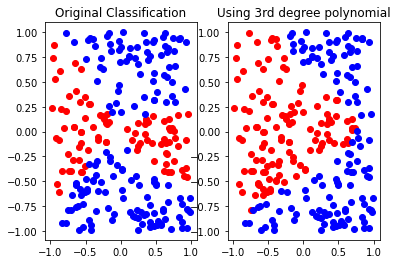

In [9]:
classify_as_1 = np.array(classify_as_1)
classify_as_neg1 = np.array(classify_as_neg1)
print(classify_as_1.shape[0], 'classified as 1')
print(classify_as_neg1.shape[0], 'classified as -1')
error = error_1 + error_2
print('The number of missclassified points is', error, 'out of', df.shape[0])
fig = plt.figure()
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.scatter(x_1[:,0], x_1[:,1], c='red')
ax1.scatter(x_2[:,0], x_2[:,1], c='blue')
ax1.title.set_text("Original Classification")
ax2.scatter(classify_as_1[:,0], classify_as_1[:,1], c='red')
ax2.scatter(classify_as_neg1[:,0], classify_as_neg1[:,1], c='blue')
ax2.title.set_text("Using 3rd degree polynomial")
plt.show()

In [10]:
#apply the polynomial kernel expansion x1, x2, x1^2, x2^2, x1*x2, x1^3, x1^2 * x2, x1 * x2^2, x2^3, x1^4, x1^3 * x2, x1^2 * x2^2, x1 * x2^3, x2^4
x_1_expanded = np.column_stack((x_1[:,0], x_1[:,1], x_1[:,0] ** 2, x_1[:,1] ** 2, x_1[:,0] * x_1[:,1], x_1[:,0] ** 3, (x_1[:,0] ** 2) * x_1[:,1], x_1[:,0] * (x_1[:,1] ** 2), x_1[:,1] ** 3, x_1[:,0]**4, (x_1[:,0]**3)*x_1[:,1], (x_1[:,0]**2)*(x_1[:,1]**2), x_1[:,0]*(x_1[:,1]**3), x_1[:,0]**4))
x_2_expanded = np.column_stack((x_2[:,0], x_2[:,1], x_2[:,0] ** 2, x_2[:,1] ** 2, x_2[:,0] * x_2[:,1], x_2[:,0] ** 3, (x_2[:,0] ** 2) * x_2[:,1], x_2[:,0] * (x_2[:,1] ** 2), x_2[:,1] ** 3, x_2[:,0]**4, (x_2[:,0]**3)*x_2[:,1], (x_2[:,0]**2)*(x_2[:,1]**2), x_2[:,0]*(x_2[:,1]**3), x_2[:,0]**4))
mean_1_expanded = np.mean(x_1_expanded, axis=0)
mean_2_expanded = np.mean(x_2_expanded, axis=0)
takenorm_1_1 = x_1_expanded-mean_1_expanded
takenorm_1_2 = x_1_expanded-mean_2_expanded
takenorm_2_1 = x_2_expanded-mean_1_expanded
takenorm_2_2 = x_2_expanded-mean_2_expanded
norm_1_1 = []
norm_1_2 = []
classify_as_1 = []
classify_as_neg1 = []
for i in range (0,m1):
    i1 = np.sqrt((takenorm_1_1[i,0]**2) + (takenorm_1_1[i,1]**2) + (takenorm_1_1[i,2]**2) + (takenorm_1_1[i,3]**2) + (takenorm_1_1[i,4]**2) + (takenorm_1_1[i,5]**2) + (takenorm_1_1[i,6]**2) + (takenorm_1_1[i,7]**2) + (takenorm_1_1[i,8]**2) + (takenorm_1_1[i,9]**2) + (takenorm_1_1[i,10]**2) + (takenorm_1_1[i,11]**2) + (takenorm_1_1[i,12]**2) + (takenorm_1_1[i,13]**2))
    norm_1_1.append(i1)
    i2 = np.sqrt((takenorm_1_2[i,0]**2) + (takenorm_1_2[i,1]**2) + (takenorm_1_2[i,2]**2) + (takenorm_1_2[i,3]**2) + (takenorm_1_2[i,4]**2) + (takenorm_1_2[i,5]**2) + (takenorm_1_2[i,6]**2) + (takenorm_1_2[i,7]**2) + (takenorm_1_2[i,8]**2) + (takenorm_1_2[i,9]**2) + (takenorm_1_2[i,10]**2) + (takenorm_1_2[i,11]**2) + (takenorm_1_2[i,12]**2) + (takenorm_1_2[i,13]**2))
    norm_1_2.append(i2)
norm_1_1 = np.array(norm_1_1)
norm_1_2 = np.array(norm_1_2)
classify_1 = []
error_1 = 0
for i in range (0,m1):
    if norm_1_1[i] < norm_1_2[i]:
        classify_1.append(1)
        classify_as_1.append(x_1[i])
    else:
        classify_1.append(0)
        error_1 = error_1 + 1
        classify_as_neg1.append(x_1[i])
norm_2_1 = []
norm_2_2 = []
for i in range (0,m2):
    i1 = np.sqrt((takenorm_2_1[i,0]**2) + (takenorm_2_1[i,1]**2) + (takenorm_2_1[i,2]**2) + (takenorm_2_1[i,3]**2) + (takenorm_2_1[i,4]**2) + (takenorm_2_1[i,5]**2) + (takenorm_2_1[i,6]**2) + (takenorm_2_1[i,7]**2) + (takenorm_2_1[i,8]**2) + (takenorm_2_1[i,9]**2) + (takenorm_2_1[i,10]**2) + (takenorm_2_1[i,11]**2) + (takenorm_2_1[i,12]**2) + (takenorm_2_1[i,13]**2))
    norm_2_1.append(i1)
    i2 = np.sqrt((takenorm_2_2[i,0]**2) + (takenorm_2_2[i,1]**2) + (takenorm_2_2[i,2]**2) + (takenorm_2_2[i,3]**2) + (takenorm_2_2[i,4]**2) + (takenorm_2_2[i,5]**2) + (takenorm_2_2[i,6]**2) + (takenorm_2_2[i,7]**2) + (takenorm_2_2[i,8]**2) + (takenorm_2_2[i,9]**2) + (takenorm_2_2[i,10]**2) + (takenorm_2_2[i,11]**2) + (takenorm_2_2[i,12]**2) + (takenorm_2_2[i,13]**2))
    norm_2_2.append(i2)
norm_2_1 = np.array(norm_2_1)
norm_2_2 = np.array(norm_2_2)
classify_2 = []
error_2 = 0
for i in range (0,m2):
    if norm_2_2[i] < norm_2_1[i]:
        classify_2.append(1)
        classify_as_neg1.append(x_2[i])
    else:
        classify_2.append(0)
        error_2 = error_2 + 1
        classify_as_1.append(x_2[i])

120 classified as 1
130 classified as -1
The number of missclassified points is 51 out of 250


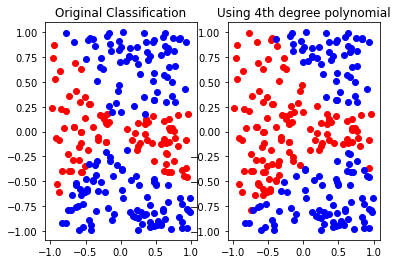

In [11]:
classify_as_1 = np.array(classify_as_1)
classify_as_neg1 = np.array(classify_as_neg1)
print(classify_as_1.shape[0], 'classified as 1')
print(classify_as_neg1.shape[0], 'classified as -1')
error = error_1 + error_2
print('The number of missclassified points is', error, 'out of', df.shape[0])
fig = plt.figure()
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
ax1.scatter(x_1[:,0], x_1[:,1], c='red')
ax1.scatter(x_2[:,0], x_2[:,1], c='blue')
ax1.title.set_text("Original Classification")
ax2.scatter(classify_as_1[:,0], classify_as_1[:,1], c='red')
ax2.scatter(classify_as_neg1[:,0], classify_as_neg1[:,1], c='blue')
ax2.title.set_text("Using 4th degree polynomial")
plt.show()